# Random Forest Model

In [1]:
# importing some needed modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the data
filename = 'drugAbuse_data_cleaned_model_ready.csv'
df = pd.read_csv(filename)

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Now, we will implement our random forest model. We will use GridSearchCV to determine what the best number of trees is. Moreover, we will use 'stumps' as our decision trees. That is, we will use trees with a max_depth of 1. We have no reason to use a scaler with decision trees, so there is no need for a pipeline.

Tuned Random Forest Parameters: {'n_estimators': 500, 'max_depth': 5}
Best score on training set is 1.0
Results on the test set:


Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5210
          1       1.00      1.00      1.00       612

avg / total       1.00      1.00      1.00      5822

Confusion Matrix: 
 [[5210    0]
 [   0  612]]
AUC Score: 1.0


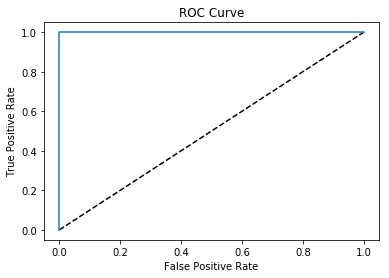

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# create our X and y
X = df.drop(columns=['Severe Psychological Distress Past Month']).values
y = df['Severe Psychological Distress Past Month'].values

# we are using RandomizedSearchCV to see what the best number of trees for our model
# because it would take a too much computational time to use GridSearch
n_trees = [10,20,50,100,500,1000]
possible_max_depths = [1,2,3,4,5]
param_grid = {'n_estimators':n_trees,
             'max_depth':possible_max_depths}

# instantiate the classifier
random_forest = RandomForestClassifier()

# instantiate the GridSearchCV object
cv = RandomizedSearchCV(random_forest,param_grid,cv=5,scoring='recall')
# we are more interested in seeing how correctly
# the classifier predicts severe psychological distress correctly

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=38)

# fit the model
cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(cv.best_params_)) 
print("Best score on training set is {}".format(cv.best_score_))

# predict the data
y_pred = cv.predict(X_test)

print("Results on the test set:")
print("\n")
# accuracy on the test set
print("Accuracy Score: {}".format(accuracy_score(y_pred,y_test)))

# classification report on the test set
print("Classification Report: \n {}".format(classification_report(y_test,y_pred)))

# confusion matrix on the test set
print("Confusion Matrix: \n {}".format(confusion_matrix(y_test,y_pred)))

# AUC score on the test set
print("AUC Score: {}".format(roc_auc_score(y_test,cv.predict_proba(X_test)[:,1])))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, cv.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()